## **EDA**

In [1]:
import sys
import pandas as pd

sys.path.append("../../src/preprocessing")
sys.path.append("../../src/visualization")


In [2]:
from data_cleaner import data_cleaner

data_cleaner("../../data/raw/btc_daily_ohlcv.csv", "../../data/processed/btc_daily_cleaned.csv")

--- Starting Data Cleaning ---
Input Path: ../../data/raw/btc_daily_ohlcv.csv
Output Path: ../../data/processed/btc_daily_cleaned.csv
Handling missing values using forward fill (ffill) and backward fill (bfill)...
Dropped columns: ['Dividends', 'Stock Splits']
Data cleaning completed. Saved to '../../data/processed/btc_daily_cleaned.csv'.
Cleaned DataFrame shape: (4027, 5) (Original shape was: (4027, 7))


/home/valid-result/Documents/GitHub/Bitcoin-Daily-Navigator/Bitcoin-Daily-Navigator/notebooks/visualization/../../src/preprocessing/data_cleaner.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/home/valid-result/Documents/GitHub/Bitcoin-Daily-Navigator/Bitcoin-Daily-Navigator/notebooks/visualization/../../src/preprocessing/data_cleaner.py:57: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True) # Handles NaNs at the very beginning if ffill couldn't


,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2025-09-21 00:00:00+00:00,115730.226562,115901.085938,115252.578125,115306.093750,22495852193
2025-09-22 00:00:00+00:00,115309.218750,115431.312500,112037.648438,112748.507812,70684158591
2025-09-23 00:00:00+00:00,112757.476562,113351.914062,111535.570312,112014.500000,47211853279


In [3]:
df_cleaned = pd.read_csv("../../data/processed/btc_daily_cleaned.csv")

df_cleaned.set_index("Date")


,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2025-09-21 00:00:00+00:00,115730.226562,115901.085938,115252.578125,115306.093750,22495852193
2025-09-22 00:00:00+00:00,115309.218750,115431.312500,112037.648438,112748.507812,70684158591
2025-09-23 00:00:00+00:00,112757.476562,113351.914062,111535.570312,112014.500000,47211853279


In [4]:
from plots import *


--- Generating Candlestick Plot ---
Plot Title: 'Bitcoin Test Plot'


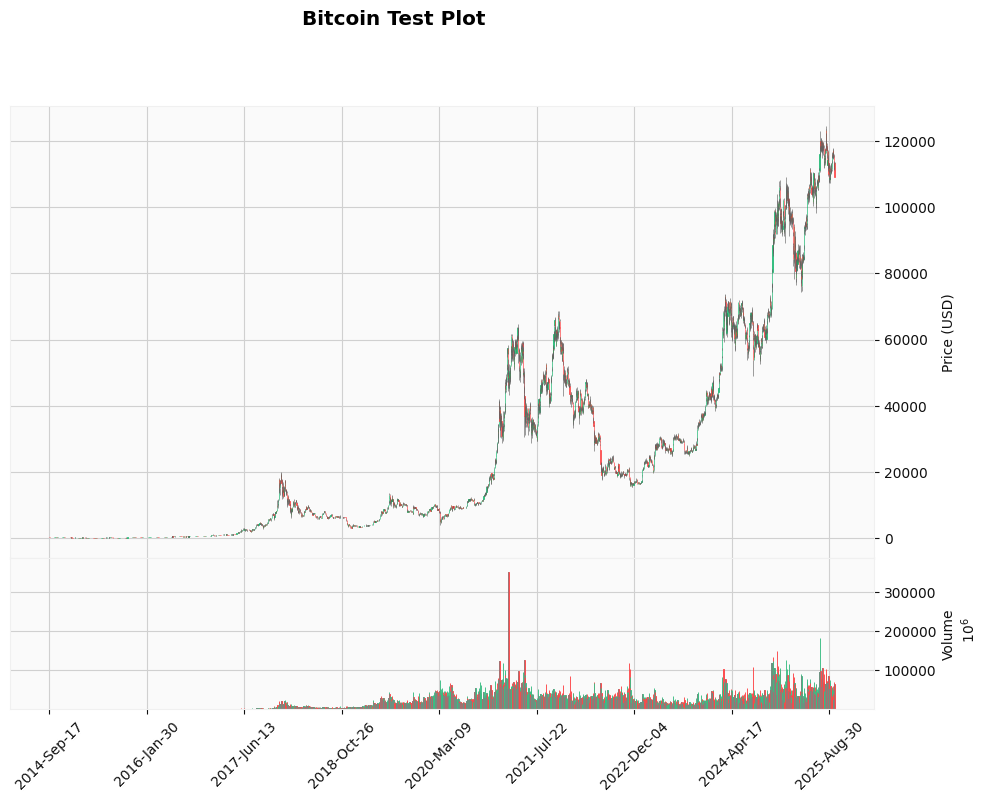

Plot generated successfully.


(<Figure size 1200x862.5 with 4 Axes>,
 [<Axes: ylabel='Price (USD)'>,
  <Axes: >,
  <Axes: ylabel='Volume\n  $10^{6}$'>,
  <Axes: >])

In [5]:
# Using strings

df_cleaned.Date = pd.to_datetime(df_cleaned.Date)

temp_df = df_cleaned.set_index("Date")

# Correct way - use keyword arguments
plot_candlestick(
    df=temp_df,
    plot_title="Bitcoin Test Plot",
)
# Or using datetime objects



>>> Running Analysis: Full History <<<
--- Starting Data Cleaning ---
Input Path: ../../data/raw/btc_daily_ohlcv.csv
Output Path: ../../data/processed/btc_daily_cleaned_full.csv
Raw data loaded. Shape: (4027, 8)
Original date range: 2014-09-17 00:00:00+00:00 to 2025-09-25 00:00:00+00:00
Handling missing values...
Missing values: 0 -> 0
Dropped columns: ['Dividends', 'Stock Splits']
Data cleaning completed. Saved to '../../data/processed/btc_daily_cleaned_full.csv'.
Final DataFrame shape: (4027, 5)
Final date range: 2014-09-17 00:00:00+00:00 to 2025-09-25 00:00:00+00:00

--- Generating Candlestick Plot ---
Plot Title: 'Bitcoin (BTC-USD) Daily Chart - Full History (2014-09-17 to 2025-09-25)'
Plot saved to: ../../data/processed/plots/full_history.png


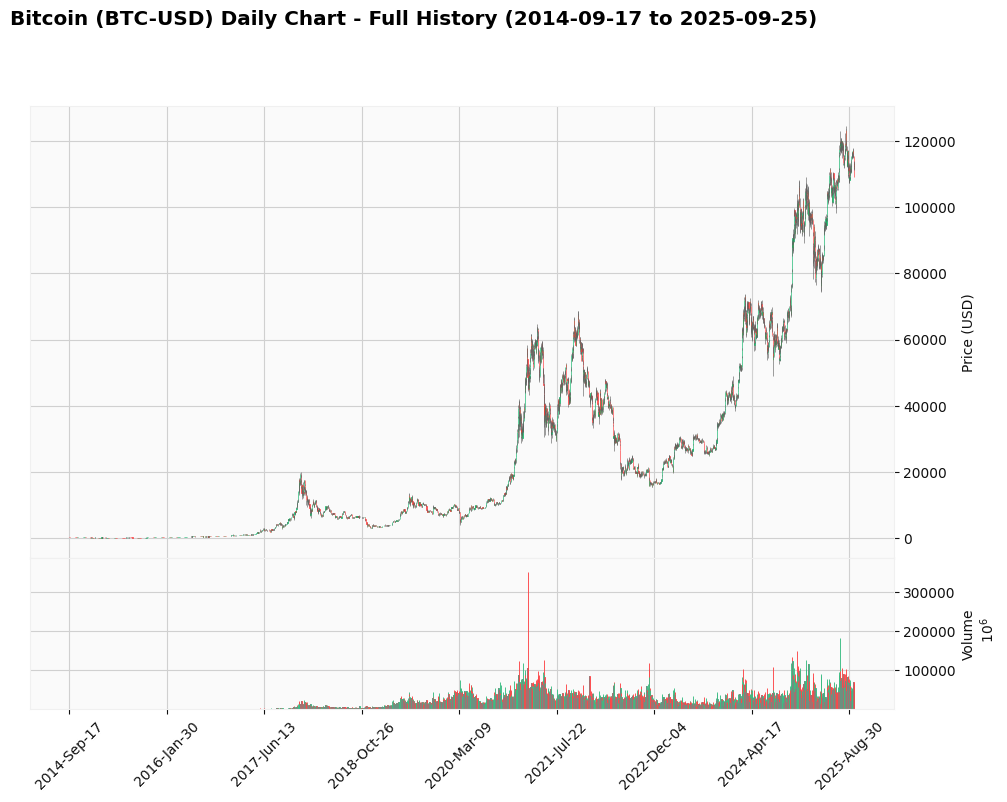

Plot generated successfully.

>>> Running Analysis: Recent 1 Year(s) <<<
--- Starting Data Cleaning ---
Input Path: ../../data/raw/btc_daily_ohlcv.csv
Output Path: ../../data/processed/btc_daily_cleaned_recent_1y.csv
Raw data loaded. Shape: (4027, 8)
Original date range: 2014-09-17 00:00:00+00:00 to 2025-09-25 00:00:00+00:00
An error occurred during data cleaning: Invalid comparison between dtype=datetime64[ns, UTC] and Timestamp
Skipping recent 1 year plot: Cleaning failed or no data.

>>> Running Analysis: Recent 2 Year(s) <<<
--- Starting Data Cleaning ---
Input Path: ../../data/raw/btc_daily_ohlcv.csv
Output Path: ../../data/processed/btc_daily_cleaned_recent_2y.csv
Raw data loaded. Shape: (4027, 8)
Original date range: 2014-09-17 00:00:00+00:00 to 2025-09-25 00:00:00+00:00
An error occurred during data cleaning: Invalid comparison between dtype=datetime64[ns, UTC] and Timestamp
Skipping recent 2 year plot: Cleaning failed or no data.

>>> Running Analysis: 2017 Bull Market Period 

In [14]:
BASE_DIR = ""
RAW_DATA_PATH = "../../data/raw/btc_daily_ohlcv.csv"
PROCESSED_DIR = "../../data/processed"



# Run analyses
results = {}

# 1. Full history analysis
results['full_history'] = plot_full_history_analysis(RAW_DATA_PATH, PROCESSED_DIR)

# 2. Recent periods (1 year, 2 years)
results['recent_1y'] = plot_recent_period_analysis(RAW_DATA_PATH, PROCESSED_DIR, years=1)
results['recent_2y'] = plot_recent_period_analysis(RAW_DATA_PATH, PROCESSED_DIR, years=2)

# 3. Custom historical periods
bull_market_2017 = plot_custom_period_analysis(
    RAW_DATA_PATH, PROCESSED_DIR, 
    start_date="2017-01-01", end_date="2017-12-31",
    period_name="2017 Bull Market"
)

covid_crash_2020 = plot_custom_period_analysis(
    RAW_DATA_PATH, PROCESSED_DIR,
    start_date="2020-01-01", end_date="2020-06-30", 
    period_name="2020 COVID Crash"
)

print("\n" + "="*50)
print("✅ Analysis Pipeline Completed!")
print("="*50)

# Summary report
successful_analyses = [k for k, v in results.items() if v[0] is not None]
print(f"Successful analyses: {len(successful_analyses)}")
print(f"Check the 'data/processed/' directory for results.")